In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("loan.csv")

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(20000, 142)

In [6]:
data.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                                 int64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [7]:
data['loan_amnt'].describe()

count    20000.000000
mean     16111.383750
std      10369.193761
min       1000.000000
25%       8000.000000
50%      14000.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [8]:
data = data.drop (['zip_code'], axis =1)

In [9]:
data.zip_code  # no attribute called zip_code because it was deleted :)

AttributeError: 'DataFrame' object has no attribute 'zip_code'

In [142]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# missing values

In [99]:
col_num =0
TotalObjects = data.shape[0]
print("column \t \t \t \t \t  Null values %")
for x in data:
    nullCount = data[x].isnull().sum();
    nullPercent = nullCount * 100 / (TotalObjects)
if nullCount > 0 and nullPercent >20:
    col_num = col_num +1
    data.drop (x, axis =1, inplace = True)
    print (str (x)+ "\t \t \t \t \t" +str (nullPercent))
print (" A tot"+str (col_num)+"deleted")

column 	 	 	 	 	  Null values %
settlement_term	 	 	 	 	100.0
 A tot1deleted


In [113]:
data['emp_title'].fillna('Unknown', inplace= True)
data['dti'].fillna(0,inplace =True)
data['revol_util'].fillna(data['revol_util'].mean(),inplace = True)

In [114]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN


In [145]:
pd.unique(data['emp_length'].values)

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [146]:
def CalculateLength (year):
    if year == '< 1 year':
        return 0.5
    elif year == '10+ years':
        return 10
    else:
        yr = str(year)
        return yr.rstrip('years')

In [147]:
data['emp_length']=data['emp_length'].apply(CalculateLength)

In [148]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
data.emp_length

0         10
1         10
2         6 
3         10
4         10
5         10
6         4 
7         10
8         10
9        0.5
10       0.5
11        2 
12        10
13        4 
14        10
15        10
16        4 
17        10
18        4 
19        10
20       0.5
21        10
22        9 
23        10
24       0.5
25       nan
26        2 
27        5 
28        10
29        10
        ... 
19970    nan
19971     2 
19972    0.5
19973     2 
19974     5 
19975     8 
19976     2 
19977    0.5
19978     1 
19979     10
19980     10
19981     10
19982    0.5
19983     8 
19984     10
19985     10
19986    0.5
19987     5 
19988     10
19989     5 
19990    nan
19991    nan
19992     2 
19993    0.5
19994     6 
19995     10
19996     10
19997     3 
19998     6 
19999    0.5
Name: emp_length, Length: 20000, dtype: object

In [153]:
def calcLoan (value):
    if value < 5000:
        return '5k and below'
    if value > 5000 and value < 10000:
        return '5k - 10 k'
    return 'other'

In [154]:
loan_ranges=data['loan_amnt'].apply(calcLoan)

In [157]:
loan_ranges

0        5k and below
1               other
2               other
3        5k and below
4               other
5           5k - 10 k
6        5k and below
7           5k - 10 k
8               other
9           5k - 10 k
10          5k - 10 k
11              other
12              other
13          5k - 10 k
14              other
15       5k and below
16          5k - 10 k
17              other
18              other
19              other
20              other
21              other
22          5k - 10 k
23       5k and below
24              other
25              other
26              other
27              other
28          5k - 10 k
29              other
             ...     
19970           other
19971           other
19972           other
19973       5k - 10 k
19974           other
19975    5k and below
19976           other
19977           other
19978           other
19979           other
19980       5k - 10 k
19981           other
19982           other
19983           other
19984     

Text(0.5, 1.0, 'pie chart for funded amount')

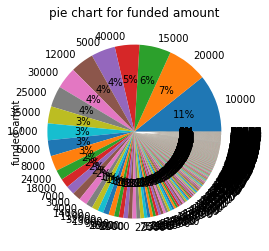

In [165]:
f = plt.figure()
data.funded_amnt.value_counts().plot.pie(autopct='%1.0f%%',)
plt.title("pie chart for funded amount")

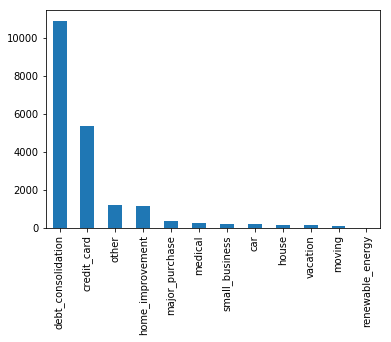

In [166]:
pur = data['purpose'].value_counts()
pur.plot(kind='bar')

In [168]:
data.to_csv('cleaned.csv',index=False,encoding ='utf -8')